In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [102]:
df=pd.read_csv("/content/drive/MyDrive/nvidia_stock_cleaned.csv")
df

,date,open,high,low,close,adjclose,volume
0,2015-01-02,0.503250,0.507000,0.495250,0.503250,0.483218,113680000
1,2015-01-05,0.503250,0.504750,0.492500,0.494750,0.475056,197952000
2,2015-01-06,0.495500,0.496000,0.479250,0.479750,0.460654,197764000
3,2015-01-07,0.483250,0.487500,0.477000,0.478500,0.459453,321808000
4,2015-01-08,0.484000,0.499500,0.483750,0.496500,0.476737,283780000
...,...,...,...,...,...,...,...
2364,2024-05-24,104.448997,106.474998,103.000000,106.469002,106.460258,429494000
2365,2024-05-28,110.244003,114.939003,109.883003,113.901001,113.891647,652728000
2366,2024-05-29,113.050003,115.491997,110.901001,114.824997,114.815567,557442000
2367,2024-05-30,114.650002,115.819000,109.663002,110.500000,110.490921,487350000


In [103]:
df.shape

(2369, 7)

In [104]:
df.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
adjclose,0
volume,0


In [105]:
df.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
adjclose,float64
volume,int64


In [106]:
from prophet import Prophet

In [107]:
df['date']=pd.to_datetime(df['date'])
prophet_df=df[['date', 'close']].rename(columns={'date': 'ds', 'close': 'y'})

In [108]:
prophet_df

,ds,y
0,2015-01-02,0.503250
1,2015-01-05,0.494750
2,2015-01-06,0.479750
3,2015-01-07,0.478500
4,2015-01-08,0.496500
...,...,...
2364,2024-05-24,106.469002
2365,2024-05-28,113.901001
2366,2024-05-29,114.824997
2367,2024-05-30,110.500000


In [109]:
model=Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpatkxg694/l8trirhu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpatkxg694/cua__ymr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87677', 'data', 'file=/tmp/tmpatkxg694/l8trirhu.json', 'init=/tmp/tmpatkxg694/cua__ymr.json', 'output', 'file=/tmp/tmpatkxg694/prophet_modelipavlyeg/prophet_model-20250627054354.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
05:43:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
05:43:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [110]:
future=model.make_future_dataframe(periods=90,freq='B')
forecast=model.predict(future)

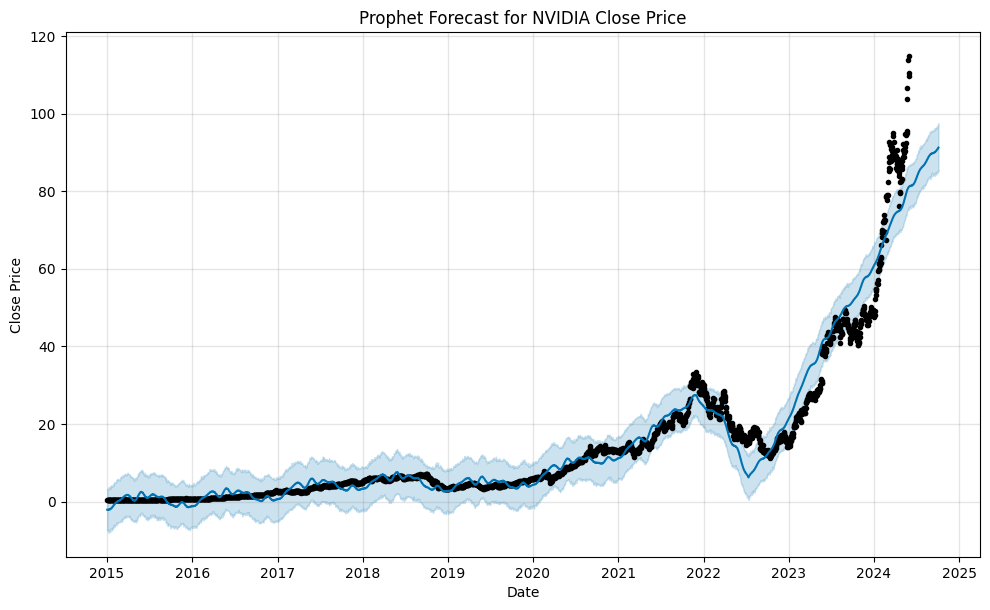

In [111]:
fig1 = model.plot(forecast)
plt.title("Prophet Forecast for NVIDIA Close Price")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()

In [112]:
merged=pd.merge(prophet_df,forecast[['ds','yhat']],on='ds',how='left')
actual=merged.dropna()
mae=mean_absolute_error(actual['y'], actual['yhat'])
rmse=np.sqrt(mean_squared_error(actual['y'], actual['yhat']))
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 2.67
RMSE: 4.30
